In [27]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

import vkapp.parser
from vkapp.parser import posts_collector, comments_collector
from vkapp.parser import access_token, api_version, offset, count

domain = input('Введите название сообщества: ')

Введите название сообщества: potomuchtoludi


In [28]:
%matplotlib inline

In [29]:
#Создаем DataFrame (таблицу) с колонками:
posts = vkapp.parser.posts_collector(access_token, api_version, offset, count, domain)
columns = ['id', 'post_likes', 'text', 'post_pics', 'date']
df = pd.DataFrame(data=posts, columns=columns)
df.sample(7)

,id,post_likes,text,post_pics,date
88,18,60,Нами пишут: «А животные? Им не надо помогать?»...,False,10/09/18 12:48
67,100,14,🔔 И еще один анонс #ПотомуЧтоЛюди \n\nНедавно ...,True,24/09/18 16:46
31,404,31,Привет! Перед Новым годом подведем очередные и...,False,28/12/18 12:39
87,23,121,⚡Мы запускаем проект #ПотомуЧтоЛюди\n\n🤔 Что э...,False,12/09/18 13:02
27,461,13,И очередные итоги! \n\nНа этот раз награждаем ...,False,21/01/19 17:28
17,532,18,Завтра новая серия #ПотомуЧтоЛюди! Герой выпус...,False,26/02/19 19:55
8,627,7,Настоящий учитель — самый важный человек после...,False,28/05/19 14:41


In [30]:
# к строкам можно делать срез по индексам
# df.loc[100:109]

In [33]:
filter_data = df[(df['date'] > '16/05/19 00:00') & (df['date'] < '30/06/19 00:00')]
filter_data.head()

,id,post_likes,text,post_pics,date
1,681,11,В 2013 году Елена Погребижская сняла документа...,False,24/09/19 15:03
3,646,41,Герой нового выпуска #ПотомуЧтоЛюди — Дмитрий ...,False,24/06/19 17:56
7,628,14,Новое видео! Ирина Прохорова рассказала об ува...,False,29/05/19 18:17
8,627,7,Настоящий учитель — самый важный человек после...,False,28/05/19 14:41
9,624,17,⚡⚡⚡ #ПотомуЧтоЛюди запускают новый проект — об...,False,21/05/19 12:35


In [36]:
# сколько в датафрейме строк и колонок
df.shape

(96, 5)

In [37]:
df.describe()

,id,post_likes
count,96.000000,96.000000
mean,280.656250,82.864583
std,220.842636,118.195700
min,1.000000,1.000000
25%,84.750000,13.000000
50%,209.500000,27.500000
75%,502.500000,90.250000
max,710.000000,558.000000


In [38]:
# считаем кол-во постов, у которых больше 500 лайков
likes_more_500 = df[df.post_likes > 500].count()
likes_more_500

id            2
post_likes    2
text          2
post_pics     2
date          2
dtype: int64

In [39]:
num_likes = df.groupby(['post_likes']).size()
# num_likes.sort_values()

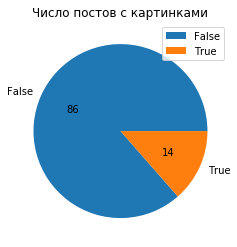

In [40]:
#кол-во постов с фото, True - есть фото
pics = df.groupby(['post_pics'])['text'].size()
plt.pie(pics, labels=pics.index, autopct='%.0f')
plt.title('Число постов с картинками')
plt.legend()

In [41]:
max_likes = df.post_likes.max()
max_likes

558

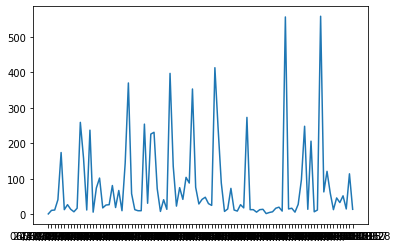

In [42]:
df_date = df.date
df_likes = df.post_likes
plt.plot(df_date, df_likes)
plt.show()